<a href="https://colab.research.google.com/github/rika-27/DMT/blob/master/Hotel_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mounting Drive & Loading Dataset
Libraries & datset are imported

In [0]:
# NOWS THE TIME TO CHANGE RUNTYPE TO GPU / TPU

# Run this cell to mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import all the neccessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Reading the csv file
#RUN THIS TO LOAD THE PREPROCESSED FILE
df = pd.read_csv('/content/drive/My Drive/Expedia/Train_expedia_bal2.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
# df1 = pd.read_csv('/content/drive/My Drive/Expedia/Train_expedia_bal2.csv')
# df1.drop(columns=['Unnamed: 0'], inplace=True)
#RUN THIS TO LOAD THE ORIGINAL FILE
# df = pd.read_csv('/content/drive/My Drive/Expedia/training_set_VU_DM.csv')
df

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool,starrating_diff,prop_starrating_montonic,avg_price_usd,booking_count,click_count,class_labels
0,1,12,187,2.529315,219,56880,4,4.0,1,2.83,0.1028,5.15,10,4.656668,0,23246,1,0,4,0,1,1,1,0,0,1.47,0.68794,180.062267,0.038519,0.056296,0
1,1,12,187,2.729016,219,59526,3,3.5,0,2.20,0.0377,4.78,19,1.673773,0,23246,1,0,4,0,1,1,1,0,0,0.27,0.31206,109.728938,0.041076,0.050992,0
2,1,12,187,4.037280,219,68914,2,3.0,1,2.20,0.0206,4.44,13,1.673773,0,23246,1,0,4,0,1,1,1,1,1,2.04,1.31206,82.487397,0.029110,0.034247,2
3,1,12,187,2.455696,219,74474,3,4.5,1,2.40,0.1255,5.03,2,3.497852,0,23246,1,0,4,0,1,1,1,0,0,0.54,0.31206,174.126262,0.030351,0.039936,0
4,1,12,187,2.594773,219,95307,4,3.5,1,2.40,0.1149,4.93,1,2.317634,0,23246,1,0,4,0,1,1,1,0,0,1.41,0.68794,130.833903,0.093298,0.111695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113331,332785,5,219,3.000000,219,77700,3,4.0,1,1.61,0.0471,0.00,2,8.489209,0,16974,1,21,3,0,1,0,0,0,0,0.00,0.31206,131.241702,0.042553,0.063830,0
1113332,332785,5,219,4.193908,219,88083,3,4.0,1,1.95,0.1520,0.00,3,6.402878,0,16974,1,21,3,0,1,0,0,0,0,1.19,0.31206,84.545789,0.157895,0.184211,0
1113333,332785,5,219,2.830436,219,94508,3,3.5,1,1.10,0.0164,0.00,4,7.122302,0,16974,1,21,3,0,1,0,0,0,0,0.17,0.31206,116.537209,0.000000,0.023256,0
1113334,332785,5,219,3.000000,219,128360,3,5.0,1,1.95,0.0662,0.00,1,10.000000,0,16974,1,21,3,0,1,0,0,1,1,0.00,0.31206,150.336757,0.081081,0.108108,2


###Understanding the Dataset


####Blunt look at the dataset

In [0]:
# Having a look at the data
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [0]:
# Looking at the first 50 rows / entries
df.head(50)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,1,2.77,0.1302,5.20,7,195.32,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,1,2.20,0.0356,4.81,18,129.35,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,0,1.61,NaN,4.14,35,85.37,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,1,2.56,0.1238,5.18,3,150.05,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,1,2.83,0.1028,5.15,10,280.69,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


No. of unique searches:  199795
No. of unique sites:  34


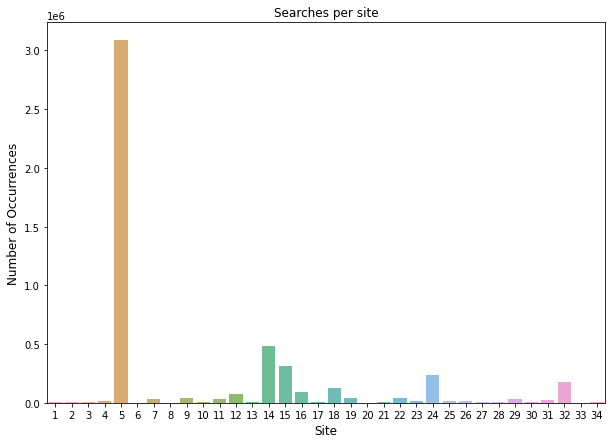

No. of unique country id of the customer:  210
No. of unique srch_destination_id:  18127


In [0]:
# Looking at the rows based on search id
print("No. of unique searches: ", len(df.srch_id.unique()))
# df.loc[df.srch_id == 1]

# Looking at the unique site_id 
print("No. of unique sites: ", len(df.site_id.unique()))
# Plot the value counts of searches through site ids - Frequency plot
newdf = df.site_id.value_counts().copy()
plt.figure(figsize=(10, 7))
sns.barplot(newdf.index, newdf.values, alpha=0.8)
plt.title('Searches per site')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Site', fontsize=12)
plt.show()

# Unique countries
print("No. of unique country id of the customer: ", len(df.visitor_location_country_id.unique()))
print("No. of unique srch_destination_id: ", len(df.srch_destination_id.unique()))

####Looking at the dataset from Search POV

In [0]:
# Looking at one search's user preferences
df[['srch_destination_id',
'srch_length_of_stay',
'srch_booking_window',
'srch_adults_count', 
'srch_children_count',
'srch_room_count',
'srch_saturday_night_bool',
'srch_query_affinity_score',
'orig_destination_distance',
'random_bool']].loc[df.srch_id == 6]

,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool
60,21106,1,5,2,0,1,0,NaN,652.84,0
61,21106,1,5,2,0,1,0,NaN,652.84,0
62,21106,1,5,2,0,1,0,NaN,652.85,0
63,21106,1,5,2,0,1,0,NaN,652.84,0
64,21106,1,5,2,0,1,0,NaN,652.78,0


In [0]:
# Looking at hotel properties per user search
 df[['visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag', 
 'click_bool', 
 'gross_bookings_usd',
 'booking_bool']].loc[df.srch_id == 6]

,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,click_bool,gross_bookings_usd,booking_bool
60,NaN,NaN,100,10759,0,2.0,0,1.95,NaN,0.0,4,97.63,0,0,NaN,0
61,NaN,NaN,100,22135,0,5.0,0,1.95,NaN,0.0,6,115.03,0,0,NaN,0
62,NaN,NaN,100,52376,2,0.0,1,1.95,NaN,0.0,2,86.03,0,0,NaN,0
63,NaN,NaN,100,104251,3,4.0,1,1.95,NaN,0.0,1,145.00,0,1,162.38,1
64,NaN,NaN,100,118866,2,4.5,1,1.95,NaN,0.0,3,183.66,0,0,NaN,0


####Looking at the dataset from Hotel POV

In [0]:
# Exploring the data from a hotel POV
# Looking at the top 5 displayed hotels: 
print("Top 5 displayed hotels: \nprop_id | occurences\n", df.prop_id.value_counts().head(5))
# taking the first one: 104517
hotel1 = df.loc[df.prop_id == 104517]
hotel1.info()

Top 5 displayed hotels: 
prop_id | occurences
 104517    2357
124342    2355
68420     2285
40279     2275
134154    2257
Name: prop_id, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 746 to 4956386
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   srch_id                      2357 non-null   int64  
 1   date_time                    2357 non-null   object 
 2   site_id                      2357 non-null   int64  
 3   visitor_location_country_id  2357 non-null   int64  
 4   visitor_hist_starrating      82 non-null     float64
 5   visitor_hist_adr_usd         82 non-null     float64
 6   prop_country_id              2357 non-null   int64  
 7   prop_id                      2357 non-null   int64  
 8   prop_starrating              2357 non-null   int64  
 9   prop_review_score            2357 non-null   float64
 10  prop_brand_bool              2357 non

In [0]:
# Checking to see if there are any differences in the properties of this one hotel
hotel1[['visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag', 
 'click_bool', 
 'gross_bookings_usd',
 'booking_bool']].describe()
#  For those features with 0 STD - That data has never changed; These are the true features of the Hotel

,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,click_bool,gross_bookings_usd,booking_bool
count,82.000000,82.000000,2357.0,2357.0,2357.0,2357.0,2357.0,2.357000e+03,2329.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,93.000000,2357.000000
mean,3.409024,164.513659,219.0,104517.0,4.0,4.0,1.0,4.160000e+00,0.247479,4.736283,13.733984,108.373649,0.913874,0.073823,330.774839,0.039457
std,0.666649,102.966210,0.0,0.0,0.0,0.0,0.0,1.074924e-13,0.030629,1.628169,8.289955,124.446647,0.280610,0.261538,276.819926,0.194721
min,2.000000,37.570000,219.0,104517.0,4.0,4.0,1.0,4.160000e+00,0.011900,0.000000,1.000000,7.950000,0.000000,0.000000,14.880000,0.000000
25%,3.000000,89.647500,219.0,104517.0,4.0,4.0,1.0,4.160000e+00,0.253400,5.290000,8.000000,66.080000,1.000000,0.000000,154.620000,0.000000
50%,3.390000,138.845000,219.0,104517.0,4.0,4.0,1.0,4.160000e+00,0.253400,5.290000,13.000000,93.980000,1.000000,0.000000,284.010000,0.000000
75%,3.817500,217.740000,219.0,104517.0,4.0,4.0,1.0,4.160000e+00,0.253400,5.300000,19.000000,132.000000,1.000000,0.000000,401.910000,0.000000
max,5.000000,514.810000,219.0,104517.0,4.0,4.0,1.0,4.160000e+00,0.380400,5.320000,38.000000,5584.000000,1.000000,1.000000,2059.730000,1.000000


####Analyzing the Test Set & Submissions Sample Set

This is to see what is expected in terms of predictions

In [0]:
# Loading the data
test = pd.read_csv('/content/drive/My Drive/Expedia/test_set_VU_DM.csv')
sub = pd.read_csv('/content/drive/My Drive/Expedia/submission_sample.csv')

In [0]:
# Let us look at the first 50 test data
test[['srch_id', 'site_id', 'visitor_location_country_id','price_usd','promotion_flag', 
 'prop_id', 'prop_location_score1', 'prop_log_historical_price', 'price_usd', 'random_bool']].head(50)
#  'click_bool', 'gross_bookings_usd','booking_bool' , 'position' -> NOT THERE

,srch_id,site_id,visitor_location_country_id,price_usd,promotion_flag,prop_id,prop_location_score1,prop_log_historical_price,price_usd,random_bool
0,1,24,216,119.00,0,3180,2.94,5.03,119.00,0
1,1,24,216,118.00,0,5543,2.64,4.93,118.00,0
2,1,24,216,49.00,0,14142,2.71,4.16,49.00,0
3,1,24,216,143.00,0,22393,2.40,5.03,143.00,0
4,1,24,216,79.00,0,24194,2.94,4.72,79.00,0
5,1,24,216,84.15,0,28181,2.30,4.68,84.15,0
6,1,24,216,79.00,0,34263,3.09,4.63,79.00,0
7,1,24,216,52.40,1,37567,2.83,4.21,52.40,0
8,1,24,216,49.99,1,50162,2.20,4.36,49.99,0
9,1,24,216,83.30,1,54937,2.08,4.75,83.30,0


In [0]:
# and the first 50 submission data
sub.head(50)
# It's clear that the same hotels in test are used for that respective srch id for submission too 
# this gives an intuition as to what to do

,srch_id,prop_id
0,1,3180
1,1,5543
2,1,14142
3,1,22393
4,1,24194
5,1,28181
6,1,34263
7,1,37567
8,1,50162
9,1,54937


In [0]:
# So it can be seen that the number of test set search_id == 1 is 28 and same for submission set
test.srch_id.value_counts(), sub.srch_id.value_counts()

(264588    38
 61274     38
 150994    38
 228713    38
 191847    38
           ..
 20972      5
 78272      5
 317911     5
 329667     5
 57570      5
 Name: srch_id, Length: 199549, dtype: int64, 264588    38
 61274     38
 150994    38
 228713    38
 191847    38
           ..
 20972      5
 78272      5
 317911     5
 329667     5
 57570      5
 Name: srch_id, Length: 199549, dtype: int64)

In [0]:
del test
del sub

####Ideas for new features
<pre>
1. Use Avg price_usd wrt date_time on Hotel POV
2. When normalizing price do so per country - every country might have prices recorded in their respective currency
</pre>

###Data Preparation

####EDA

In [0]:
# WILLIAM

####Preprocessing

<h6>Obtaining a Valid Set Features by:</h6>
<ul>
  <li>Removing Null Values</li>
  <li>Add features</li>
  <li>Remove non-useful features</li>
  <li>scaling and balancing data</li>
  <li>Feature Selection</li>
</ul> 

#####Fixing Null values & Removing Unwanted Features

In [0]:
# Looking at the Null Values
df.isnull().sum()

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
visitor_hist_starrating        0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
random_bool                    0
click_bool                     0
booking_bool                   0
dtype: int64

In [0]:
# Dropping non-useful features
df.drop(columns=['comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff', 
       'srch_query_affinity_score', # does not give useful info
       'orig_destination_distance', # Hotel bookings will be irrespective of distance between origin and destn. no useful info
       'gross_bookings_usd', # Booking's won't be affected by the total bill, when we know the price beforehand.
       'visitor_hist_adr_usd', # Cannot impute visitor history bookings
       'date_time'
       ], inplace=True)

In [0]:
# THIS WILL TAKE 4-5HRS TO RUN (USE TRAIN_EXPEDIA.CSV INSTEAD)
def impute_rand_norm(df, prop_id, feature_name):
  '''
  Function to impute random values from a feature's normal distribution inplace of it's null values.
  This is imputed for one property id only.
  If feature doesn't have a distribution, then it will create a uniform distribution (ranged between 1.0 to 5.0)
  '''
  if(len(df.loc[df.notnull() == True])):
    fmean = df.mean()
    fstd =  df.std()
    return pd.Series([np.abs(np.random.normal(loc=fmean, scale = fstd, size = len(df)))]).values[0]
  else:
    return pd.Series([np.random.uniform(1, 5, [len(df)])]).values[0]

i=1
for prop_id in df.prop_id.unique(): 
  df['prop_review_score'].loc[df.prop_id == prop_id] = impute_rand_norm(df['prop_review_score'].loc[df.prop_id == prop_id], prop_id, 'prop_review_score')
  df['visitor_hist_starrating'].loc[df.prop_id == prop_id] = impute_rand_norm(df['visitor_hist_starrating'].loc[df.prop_id == prop_id], prop_id, 'visitor_hist_starrating')
  print("Completed: ", i ,"/", len(df.prop_id.unique())) 
  i += 1
df.visitor_hist_starrating.loc[df.visitor_hist_starrating.isna() == True] = df.prop_starrating.loc[df.visitor_hist_starrating.isna() == True]
print("Done!")

i=1
for country in df.prop_country_id.unique():
  df.prop_location_score2.loc[df.prop_country_id == country] = df.prop_location_score2.loc[df.prop_country_id == country].fillna(df.prop_location_score2.loc[df.prop_country_id == country].quantile(0.25))
  print("Completed: ", i ,"/", len(df.prop_country_id.unique())) 
  i += 1
df.prop_location_score2.loc[df.prop_location_score2.isna() == True] = df.prop_location_score2.loc[df.prop_location_score2.isna() == True].fillna(0.0)
print("Done!")

#df.prop_review_score.loc[df.prop_review_score.isna() == True] = df.prop_starrating.loc[df.prop_review_score.isna() == True]
df.to_csv('train_expedia.csv')
df.isnull().sum()

#####Composite Features

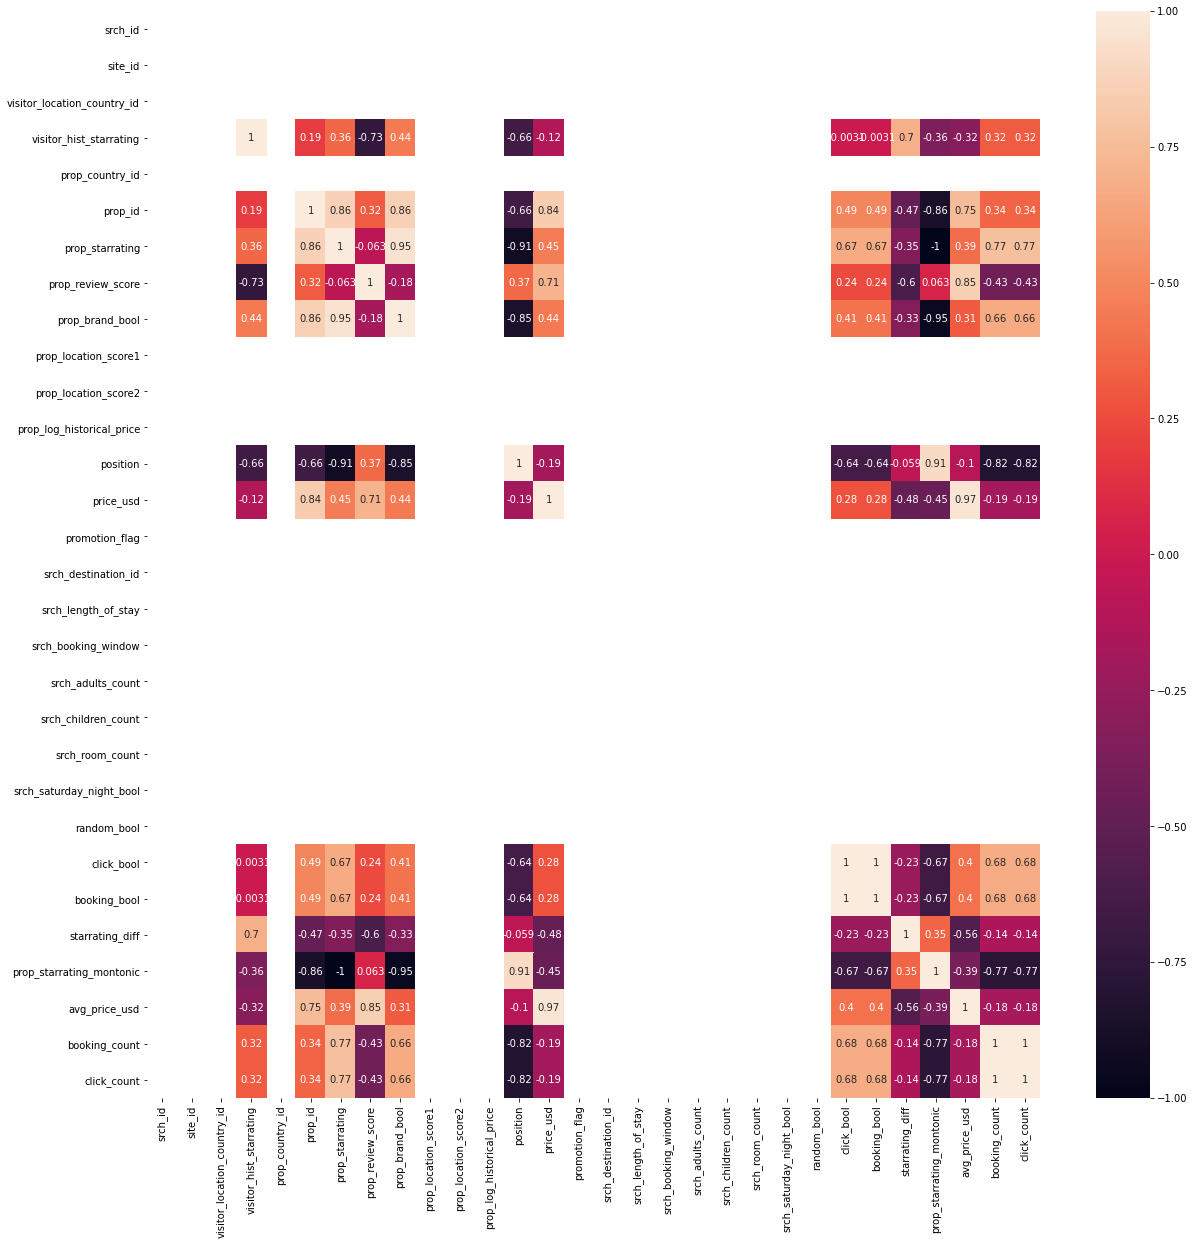

In [0]:
# Plotting the correlation matrix
newdf = df.loc[df.srch_id == df.srch_id.unique()[2]].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(newdf, annot=True)
plt.show()
# plt.savefig("correlation1.png")

In [0]:
# Train_expedia has date_time
df.drop(columns=['date_time'], inplace=True)

In [0]:
# THE ONE THAT WE DIDNT USE - LOGNORM_PRICE_USD

# Normalize log10(price_usd)
# plt.figure(figsize=(10, 7))
# sns.boxplot(y = df.price_usd[df.srch_id == df.srch_id.unique()[0]])
# plt.show()

# df['lognorm_price_usd'] = np.zeros(len(df))
# i = 1
# for srch_id in df.srch_id.unique():
#   df[['lognorm_price_usd']].loc[df.srch_id == srch_id] = np.log10(df[['price_usd']].loc[df.srch_id == srch_id] / (df[['price_usd']].loc[df.srch_id == srch_id].mean() + df[['price_usd']].loc[df.srch_id == srch_id].std()))
#   print("Completed: ", i, "/", len(df.srch_id.unique()))
#   i +=1

In [0]:
# Having a feature that takes star rating difference bwteen history raings and prop rating
df['starrating_diff'] = np.abs(round(df.visitor_hist_starrating, 2) - df.prop_starrating)

# prop_starrating feature has non-monotonic utility. This is brought out by creating the below feature
df['prop_starrating_montonic'] = np.abs(df.prop_starrating - df.prop_starrating.loc[df.booking_bool == 1].mean())
# df.prop_starrating.loc[df.booking_bool == 1].mean() == 3.3120601199508637

3.3120601199508637

In [0]:
df['avg_price_usd'] = np.zeros(len(df))
df['booking_count'] = np.zeros(len(df))
df['click_count'] = np.zeros(len(df))
i = 1
for prop_id in df.prop_id.unique():
  df['avg_price_usd'].loc[df.prop_id == prop_id] = df['price_usd'].loc[df.prop_id == prop_id].mean()
  df['booking_count'].loc[df.prop_id == prop_id] = df['booking_bool'].loc[df.prop_id == prop_id].where(df['booking_bool'].loc[df.prop_id == prop_id] == 1).sum() / len(df['booking_bool'].loc[df.prop_id == prop_id]) 
  df['click_count'].loc[df.prop_id == prop_id] = df['click_bool'].loc[df.prop_id == prop_id].where(df['click_bool'].loc[df.prop_id == prop_id] == 1).sum() / len(df['click_bool'].loc[df.prop_id == prop_id]) 
  print("Completed: ", i, "/", len(df.prop_id.unique()))
  i += 1 



In [0]:
df.isnull().sum()
df.describe()
# df.to_csv('Train_expedia11.csv') 
#!zip -r 'expedia.zip' 'Train_expedia1.csv

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool,starrating_diff,prop_starrating_montonic,avg_price_usd,booking_count,click_count
count,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.233313e+00,1.739739e+02,7.007918e+04,3.180525e+00,3.776599e+00,6.346994e-01,2.872589e+00,1.062381e-01,4.317913e+00,1.685624e+01,2.542096e+02,2.156198e-01,1.404263e+04,2.385427e+00,3.747417e+01,1.972637e+00,3.504918e-01,1.110525e+00,5.022127e-01,2.959004e-01,4.474858e-02,2.791051e-02,7.777983e-01,8.304720e-01,2.542096e+02,2.791051e-02,4.474858e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,8.506198e-01,6.834525e+01,4.060992e+04,1.051024e+00,1.050934e+00,4.815144e-01,1.531011e+00,1.480711e-01,1.834869e+00,1.042566e+01,1.600124e+04,4.112517e-01,8.111843e+03,2.053243e+00,5.199341e+01,8.570628e-01,7.325692e-01,4.172290e-01,4.999952e-01,4.564465e-01,2.067514e-01,1.647165e-01,7.543955e-01,6.574710e-01,2.895059e+03,3.718437e-02,4.854577e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.120601e-01,3.375000e+00,0.000000e+00,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.750308e+00,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.820000e-02,4.450000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.101000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,3.120601e-01,9.508475e+01,0.000000e+00,1.515152e-02
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.247848e+00,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,2.770000e+00,3.780000e-02,4.910000e+00,1.600000e+01,1.220000e+02,0.000000e+00,1.354100e+04,2.000000e+00,1.700000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01,6.879399e-01,1.330982e+02,1.895735e-02,3.448276e-02
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.822090e+00,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,4.040000e+00,1.374000e-01,5.310000e+00,2.600000e+01,1.849600e+02,0.000000e+00,2.108400e+04,3.000000e+00,4.800000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.130000e+00,1.312060e+00,2.000695e+02,3.846154e-02,6.060606e-02
max,3.327850e+05,3.400000e+01,2.310000e+02,8.928596e+00,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,6.980000e+00,1.000000e+00,6.210000e+00,4.000000e+01,1.972633e+07,1.000000e+00,2.841600e+04,5.700000e+01,4.920000e+02,9.000000e+00,9.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.570000e+00,3.312060e+00,1.173038e+06,1.000000e+00,1.000000e+00


#####Feature Normalization

In [0]:
# Looking at the numbers
df.info()

# Things that need to be normalized by srch_id: 
# price_usd, avg_price_usd

# df[['price_usd', 'avg_price_usd']].describe()
df.describe()

In [0]:
i=1
for srch_id in df.srch_id.unique():
  mask = df.srch_id == srch_id
  # df[['price_usd']].loc[df.srch_id == srch_id] = pd.Series((10*normalize([df[['price_usd']].loc[df.srch_id == srch_id].values]))[0])
  # df[['avg_price_usd']].loc[df.srch_id == srch_id] = pd.Series((10*normalize([df[['avg_price_usd']].loc[df.srch_id == srch_id].values]))[0])
  df.loc[mask, 'price_usd'] /= df.loc[mask, 'price_usd'].max()
  df.loc[mask, 'price_usd'] *= 10
  df.loc[mask, 'avg_price_usd'] /= df.loc[mask, 'price_usd'].max()
  df.loc[mask, 'avg_price_usd'] *= 10
  print("completed: ", i, "/", len(df.srch_id.unique()))
  i += 1
print("Pushing to CSV...")
df.to_csv('Train_expedia_norm.csv')
print("Done!")
# !zip -r 'expedia.zip' 'Train_expedia_norm.csv'

Streaming output truncated to the last 5000 lines.
completed:  194799 / 199795
completed:  194800 / 199795
completed:  194801 / 199795
completed:  194802 / 199795
completed:  194803 / 199795
completed:  194804 / 199795
completed:  194805 / 199795
completed:  194806 / 199795
completed:  194807 / 199795
completed:  194808 / 199795
completed:  194809 / 199795
completed:  194810 / 199795
completed:  194811 / 199795
completed:  194812 / 199795
completed:  194813 / 199795
completed:  194814 / 199795
completed:  194815 / 199795
completed:  194816 / 199795
completed:  194817 / 199795
completed:  194818 / 199795
completed:  194819 / 199795
completed:  194820 / 199795
completed:  194821 / 199795
completed:  194822 / 199795
completed:  194823 / 199795
completed:  194824 / 199795
completed:  194825 / 199795
completed:  194826 / 199795
completed:  194827 / 199795
completed:  194828 / 199795
completed:  194829 / 199795
completed:  194830 / 199795
completed:  194831 / 199795
completed:  194832 / 1997

#####Feature Balancing

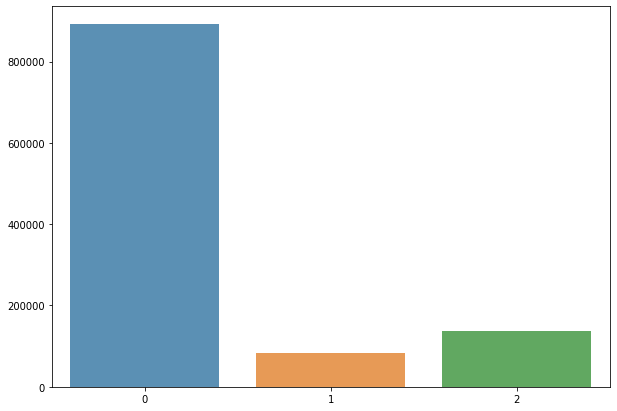

0    891457
2    138390
1     83489
Name: class_labels, dtype: int64

In [0]:
# For classes
# df['class_labels'] = df.booking_bool + df.click_bool
# sns.barplot(y = )
plt.figure(figsize=(10, 7))
classes = df.class_labels.value_counts()
sns.barplot(classes.index, classes.values, alpha=0.8)
plt.show()

df.class_labels.value_counts()

In [0]:
import random

unq = df.srch_id.unique()
unq1 = unq[0:99897]
unq2 = unq[99898: -1]

i = 1
idc = []
for srch_id in unq1: #HERE
  mask = df.srch_id == srch_id
  idx = list(df.loc[mask].loc[df.class_labels == 0].index)
  chx = random.choices(idx, k= min(5, len(idx)))
  idc.extend([x for x in idx if x not in chx])
  print("completed: ", i, "/", len(unq1)) #HERE
  i += 1
print("no. of indices to be dropped: ", len(idc))

df.drop(idc, inplace = True)

print("dropped! Pushing to CSV..")
df.to_csv("Train_expedia_bal1.csv") #HERE

df.to_csv("/content/drive/My Drive/Expedia/Train_expedia_bal1.csv") #HERE

Streaming output truncated to the last 5000 lines.
completed:  94901 / 99897
completed:  94902 / 99897
completed:  94903 / 99897
completed:  94904 / 99897
completed:  94905 / 99897
completed:  94906 / 99897
completed:  94907 / 99897
completed:  94908 / 99897
completed:  94909 / 99897
completed:  94910 / 99897
completed:  94911 / 99897
completed:  94912 / 99897
completed:  94913 / 99897
completed:  94914 / 99897
completed:  94915 / 99897
completed:  94916 / 99897
completed:  94917 / 99897
completed:  94918 / 99897
completed:  94919 / 99897
completed:  94920 / 99897
completed:  94921 / 99897
completed:  94922 / 99897
completed:  94923 / 99897
completed:  94924 / 99897
completed:  94925 / 99897
completed:  94926 / 99897
completed:  94927 / 99897
completed:  94928 / 99897
completed:  94929 / 99897
completed:  94930 / 99897
completed:  94931 / 99897
completed:  94932 / 99897
completed:  94933 / 99897
completed:  94934 / 99897
completed:  94935 / 99897
completed:  94936 / 99897
completed:  9

#####Feature Selection - Boruta

In [0]:
# !pip install boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

#initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)

boruta = BorutaPy(
    estimator = forest, 
    n_estimators = 'auto',
    verbose = 1,
    random_state = 1,
    max_iter = 100 # number of trials to perform
)

# Using a random 10% of the srch_ids
import random
ids = random.choices(df.srch_id.unique(), k = round(0.1*len(df.srch_id.unique())))

# Dropping features with no correlation
mldf = df.drop(columns=['position', 'booking_bool', 'click_bool', 'click_count',
                        'booking_count','site_id', 'srch_length_of_stay', 
                        'srch_booking_window','srch_adults_count', 'srch_children_count', 
                        'srch_room_count','srch_saturday_night_bool'])
# retrieving those features part of the 10% of randomly selected srch_ids
mldf = mldf[mldf.srch_id.isin(ids)]

### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(mldf.drop(columns=['class_labels']).values, mldf.class_labels.values)
### print results
green_area = mldf.drop(columns=['class_labels']).columns[boruta.support_].to_list()
blue_area = mldf.drop(columns=['class_labels']).columns[boruta.support_weak_].to_list()
print('Confirmed features: ', green_area)
print('Tentative features: ', blue_area)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100


BorutaPy finished running.

Iteration: 	27 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	9
Confirmed features:  ['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']
Tentative features:  []


Boruta Output [for 27 features]:
<pre>Iteration: 	100 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	19
Confirmed features:  ['prop_location_score1', 'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'booking_count', 'click_count']
Tentative features:  ['prop_country_id']</pre>

Boruta Output [for 18 features]: 
<pre>
BorutaPy finished running.

Iteration: 	27 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	9
Confirmed features:  ['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']
Tentative features:  []
</pre>

###Learning to Rank 

Machine Learning models

#####LambdaMart

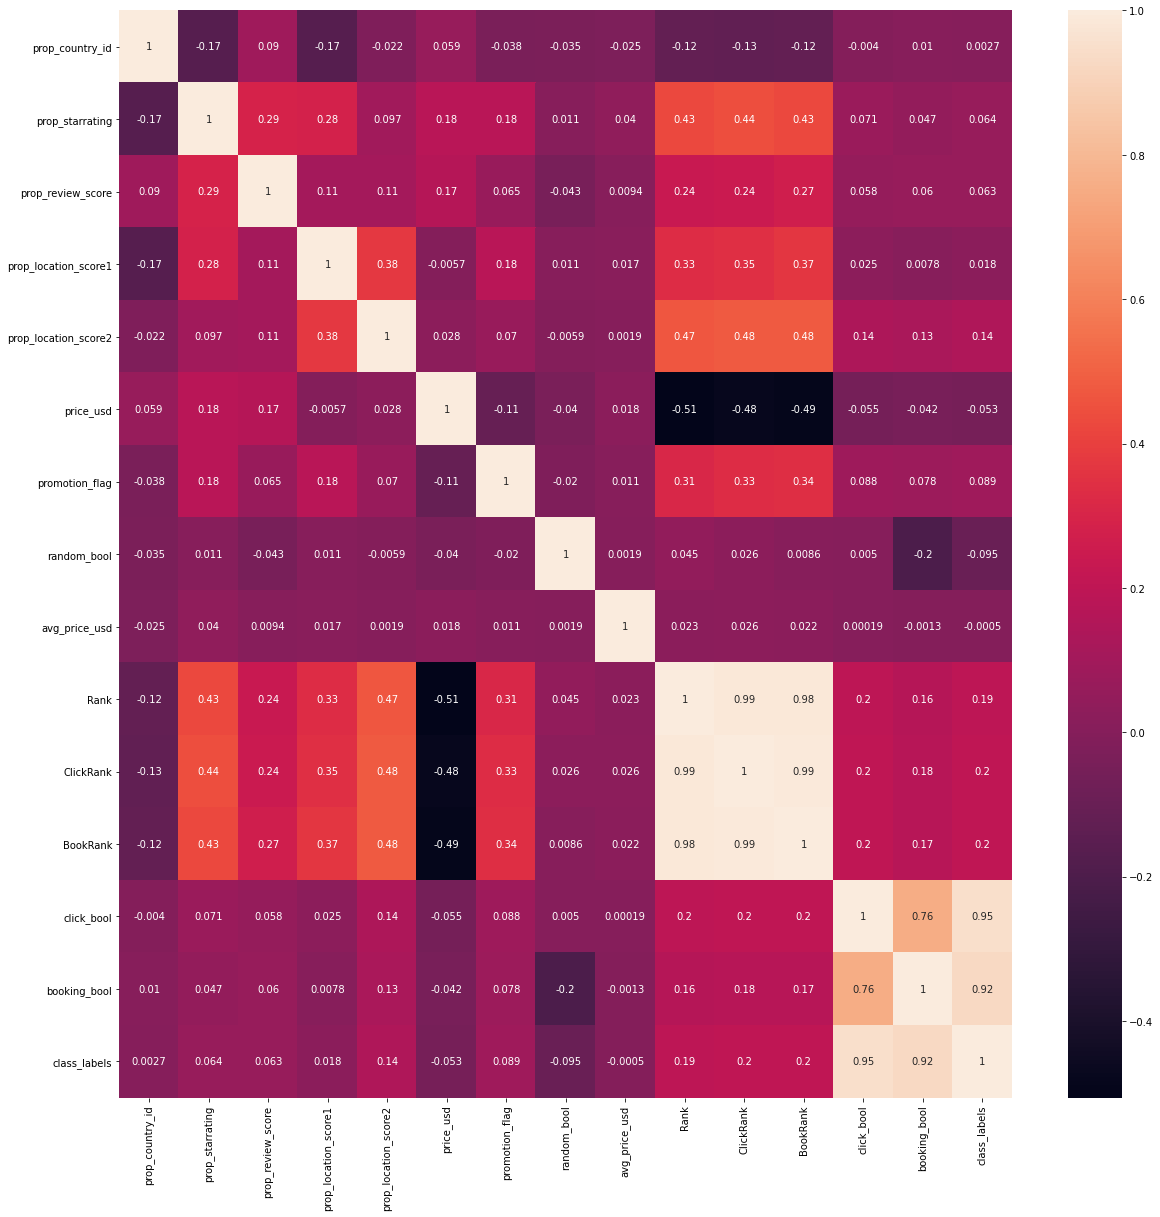

In [0]:
X = df[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']].values
df['Rank'] = lamdaMart.predict(X)
df['ClickRank'] = lamdaMart_click.predict(X)
df['BookRank'] = lamdaMart_book.predict(X)
mldf = df[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd', 'Rank',
           'ClickRank', 'BookRank', 'click_bool', 'booking_bool','class_labels']]
plt.figure(figsize=(20, 20))
sns.heatmap(mldf.corr(), annot=True)
plt.show()

In [0]:
# Splitting the dataset (MIGHT TAKE 2-3 MINS TO RUN)
import random

# Using a random 10% of the srch_ids
# random.seed(4) # Change the seed for a different train & test dataset
# train_ids = random.choices(df.srch_id.unique(), k = round(0.07*len(df.srch_id.unique())))
# test_unique_srch_ids = [x for x in df.srch_id.unique() if x not in train_ids]
# test_ids = random.choices(test_unique_srch_ids, k = round(0.03*len(df.srch_id.unique())))
# cv_ids = random.choices(train_ids, k = round(0.3*len(train_ids)))
# train_ids = [x for x in train_ids if x not in cv_ids]

train_ids = df.srch_id.unique()[41957:139857]
cv_ids = df.srch_id.unique()[0:41957]
test_ids = df.srch_id.unique()[139857:]


# Dropping features with no correlation
mldf = df.drop(columns=['position', 'click_count',
                        # 'booking_bool', 'click_bool', 
                        'booking_count','site_id', 'srch_length_of_stay', 
                        'srch_booking_window','srch_adults_count', 'srch_children_count', 
                        'srch_room_count','srch_saturday_night_bool'])
# retrieving those features part of the 10% of randomly selected srch_ids
train = mldf[mldf.srch_id.isin(train_ids)]
test = mldf[mldf.srch_id.isin(test_ids)]
cv = mldf[mldf.srch_id.isin(cv_ids)]

X_train = train[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']].values
# y_train = train['class_labels'].values
y_train = train[['booking_bool']].values
# y_train = y_train.reshape(y_train.shape[0], 1)

X_cv= cv[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']].values
# y_cv = cv['class_labels'].values
y_cv = cv[['booking_bool']].values
# y_cv = y_cv.reshape(y_cv.shape[0], 1)

X_test= test[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']].values
# y_test = test['class_labels'].values
y_test = test[['booking_bool']].values
# y_test = y_test.reshape(y_test.shape[0], 1)

print(len(mldf), "->", "train{ X:", X_train.shape, "y:", y_train.shape, 
      "}, cv{ X:", X_cv.shape, "y:", y_cv.shape, "}",
      "}, test{ X:", X_test.shape, "y:", y_test.shape, "}")

# Q_train = np.array(list(map(lambda x: train.srch_id.loc[train.srch_id == x].value_counts().values[0], train.srch_id.unique())))
# Q_test = np.array(list(map(lambda x: test.srch_id.loc[test.srch_id == x].value_counts().values[0], test.srch_id.unique())))
# Q_cv = np.array(list(map(lambda x: cv.srch_id.loc[cv.srch_id == x].value_counts().values[0], cv.srch_id.unique())))

Q_train = train.srch_id.values
# Q_train = Q_train.reshape(Q_train.shape[0], 1)

Q_cv = cv.srch_id.values
# Q_cv= Q_cv.reshape(Q_cv.shape[0], 1)

Q_test = test.srch_id.values
# Q_test = Q_test.reshape(Q_test.shape[0], 1)

print("Query data (Train, CV, Test):", Q_train.shape, Q_cv.shape, Q_test.shape)

1113336 -> train{ X: (545337, 9) y: (545337, 1) }, cv{ X: (234019, 9) y: (234019, 1) } }, test{ X: (333980, 9) y: (333980, 1) }
Query data (Train, CV, Test): (545337,) (234019,) (333980,)


In [0]:
# LAMBDAMART

!pip install pyltr
import pyltr
import warnings

metric = pyltr.metrics.NDCG(k=5) # NDCG@5

# Only needed if you want to perform validation (early stopping & trimming)
monitor = pyltr.models.monitors.ValidationMonitor(
    X_cv, y_cv, Q_cv, metric=metric, stop_after=250)

lamdaMart = pyltr.models.LambdaMART(
    metric=metric,
    n_estimators=1000,
    learning_rate=0.02,
    max_features=0.5,
    query_subsample=0.5,
    max_leaf_nodes=10,
    min_samples_leaf=64,
    verbose=1,
)

warnings.filterwarnings("ignore", category=FutureWarning)
lamdaMart.fit(X_train, y_train, Q_train, monitor=monitor)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Iter  Train score  OOB Improve    Remaining                           Monitor Output 
    1       0.3320       0.2207      429.68m      C:      0.3278 B:      0.3278 S:  0
    2       0.3626       0.0309      386.31m      C:      0.3590 B:      0.3590 S:  0
    3       0.4190       0.0534      373.69m      C:      0.4137 B:      0.4137 S:  0
    4       0.4168      -0.0003      366.61m      C:      0.4137 B:      0.4137 S:  0
    5       0.4206       0.0017      362.37m      C:      0.4158 B:      0.4158 S:  0
    6       0.4283       0.0121      358.80m      C:      0.4269 B:      0.4269 S:  0
    7       0.4343       0.0021      356.22m      C:      0.4294 B:      0.4294 S:  0
    8       0.4337       0.0018      354.22m      C:      0.4309 B:      0.4309 S:  0
    9       0.4342       0.0005      352.80m      C:      0.4315 B:      0.4315 S:  0
   10       0.4344       0.0002      352.08m      C:      0.4320 B:      0.4320 S:  0
   15       0.4369       0.0003      347.02m      C: 

In [0]:
# save the model to disk
!pip install pyltr
# import pyltr
import pickle
# filename = '/content/drive/My Drive/Expedia/lambdaMart_model_Book2.sav'
# pickle.dump(lamdaMart, open(filename, 'wb'))

# TO LOAD: 
# load the model from drive
lamdaMart = pickle.load(open('/content/drive/My Drive/Expedia/lambdaMart_model.sav', 'rb'))
lamdaMart_click = pickle.load(open('/content/drive/My Drive/Expedia/lambdaMart_model_Click2.sav', 'rb'))
lamdaMart_book = pickle.load(open('/content/drive/My Drive/Expedia/lambdaMart_model_Book2.sav', 'rb'))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
# # Predicting the test values and checking for the score
# y_pred = lamdaMart.predict(X_test)
# print('Scores for Test set:')
# print('Random ranking:', metric.calc_mean_random(Q_test, y_test))
# print('Our model:', metric.calc_mean(Q_test, y_test, y_pred))

# # Predicting the train values and checking for the score
# y_pred = lamdaMart.predict(X_train)
# print('\nScores for Train set:')
# print('Random ranking:', metric.calc_mean_random(Q_train, y_train))
# print('Our model:', metric.calc_mean(Q_train, y_train, y_pred))

# # Predicting the CV values and checking for the score
# y_pred = lamdaMart.predict(X_cv)
# print('\nScores for CV set:')
# print('Random ranking:', metric.calc_mean_random(Q_cv, y_cv))
# print('Our model:', metric.calc_mean(Q_cv, y_cv, y_cv))

Scores for Test set:
Random ranking: 162336258968439.75
Our model: 235905080384452.22

Scores for Train set:
Random ranking: 0.3701786081433916
Our model: 0.5162354147816761

Scores for CV set:
Random ranking: 0.364687830152604
Our model: 0.6860369044340402


In [0]:
# test['Rank'] = y_pred
# test[['srch_id','prop_id', 'Rank']].loc[test.srch_id == 143].sort_values(by = 'Rank', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,srch_id,prop_id,Rank
483,143,129378,-0.588781
482,143,55943,-1.312938
484,143,130894,-1.633550
485,143,138896,-2.220311


In [0]:
# lamdaMart.predict accepts a numpy array
# Needs to be (m, 9) 2d array with 9 being the number of features
# and m being the no. of examples.
# The features are Boruta output features

X = df[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']].values
Q = df.srch_id.values
y = df.class_labels.values

df_pred = lamdaMart.predict(X)
print('Random ranking:', metric.calc_mean_random(Q, y))
print('Our model:', metric.calc_mean(Q, y, df_pred))

Random ranking: 564826904739317.4
Our model: 692170910170346.0


#####CatBoost

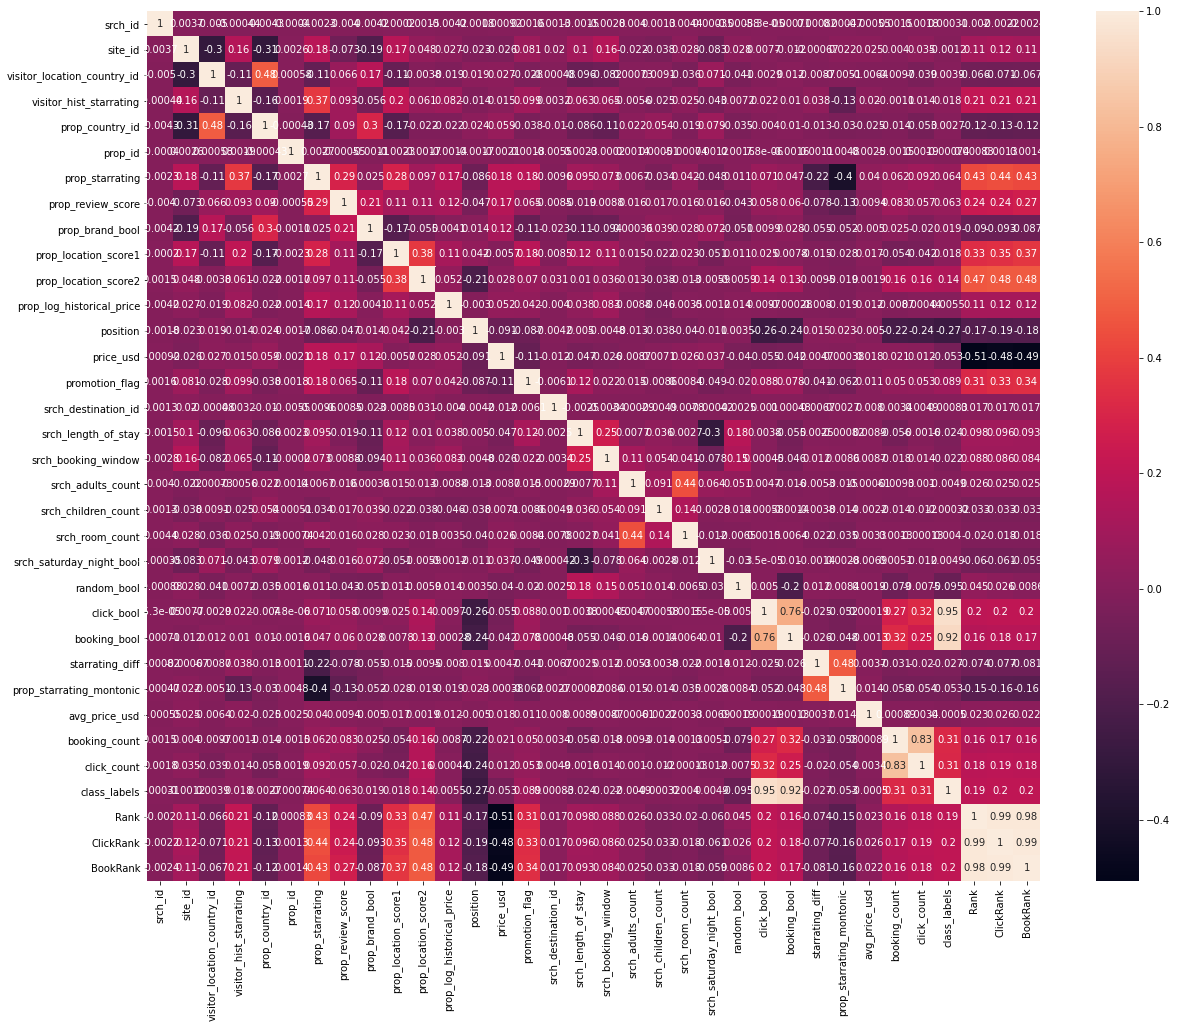

In [0]:
# loading lambdaMart to obtain "Rank" feature
# !pip install pyltr
# import pyltr
# import pickle
# lamdaMart = pickle.load(open('/content/drive/My Drive/Expedia/lambdaMart_model.sav', 'rb'))
# lamdaMart_click = pickle.load(open('/content/drive/My Drive/Expedia/lambdaMart_model_Click2.sav', 'rb'))
# lamdaMart_book = pickle.load(open('/content/drive/My Drive/Expedia/lambdaMart_model_Book2.sav', 'rb'))


X = df[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']].values
df['Rank'] = lamdaMart.predict(X)
df['ClickRank'] = lamdaMart_click.predict(X)
df['BookRank'] = lamdaMart_book.predict(X)
# y = df[['click_bool', 'booking_bool']].values
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [0]:
# Splitting the dataset (MIGHT TAKE 2-3 MINS TO RUN)
import random

# Using a random 20% of the srch_ids
# random.seed(55) # Change the seed for a different train & test dataset
# train_ids = random.choices(df.srch_id.unique(), k = round(0.7*len(df.srch_id.unique())))
# test_unique_srch_ids = [x for x in df.srch_id.unique() if x not in train_ids]
# test_ids = test_unique_srch_ids
train_ids = df.srch_id.unique()[0:139857]
test_ids = df.srch_id.unique()[139857:]
# test_ids = random.choices(test_unique_srch_ids, k = round(0.3*len(df.srch_id.unique())))
# cv_ids = random.choices(train_ids, k = round(0.3*len(train_ids)))
# train_ids = [x for x in train_ids if x not in cv_ids]

# Dropping features with no correlation
mldf = df.drop(columns=['position',  'click_count',
                        # 'booking_bool', 'click_bool',
                        'booking_count','site_id', 'srch_length_of_stay', 
                        'srch_booking_window','srch_adults_count', 'srch_children_count', 
                        'srch_room_count','srch_saturday_night_bool'])
# retrieving those features part of the 10% of randomly selected srch_ids
train = mldf[mldf.srch_id.isin(train_ids)]
test = mldf[mldf.srch_id.isin(test_ids)]
# cv = mldf[mldf.srch_id.isin(cv_ids)]

X_train = train[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd', 'Rank',
           'ClickRank', 'BookRank']].values
y_train = train['class_labels'].values
# y_train = train[['click_bool', 'booking_bool']].values
# y_train = y_train.reshape(y_train.shape[0], 1)

# X_cv= cv[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
#            'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']].values
# y_cv = cv['class_labels'].values
# y_cv = y_cv.reshape(y_cv.shape[0], 1)

X_test= test[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1',
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd', 'Rank',
           'ClickRank', 'BookRank']].values
y_test = test['class_labels'].values
# y_test = test[['click_bool', 'booking_bool']].values
# y_test = y_test.reshape(y_test.shape[0], 1)

print(len(mldf), "->", "train{ X:", X_train.shape, "y:", y_train.shape, 
      # "}, cv{ X:", X_cv.shape, "y:", y_cv.shape, "}",
      "}, test{ X:", X_test.shape, "y:", y_test.shape, "}")

# Q_train = np.array(list(map(lambda x: train.srch_id.loc[train.srch_id == x].value_counts().values[0], train.srch_id.unique())))
# Q_test = np.array(list(map(lambda x: test.srch_id.loc[test.srch_id == x].value_counts().values[0], test.srch_id.unique())))
# Q_cv = np.array(list(map(lambda x: cv.srch_id.loc[cv.srch_id == x].value_counts().values[0], cv.srch_id.unique())))

Q_train = train.srch_id.values
# Q_train = Q_train.reshape(Q_train.shape[0], 1)

# Q_cv = cv.srch_id.values
# Q_cv= Q_cv.reshape(Q_cv.shape[0], 1)

Q_test = test.srch_id.values
# Q_test = Q_test.reshape(Q_test.shape[0], 1)

print("Query data (Train, Test):", Q_train.shape, 
      # Q_cv.shape, 
      Q_test.shape)

1113336 -> train{ X: (779356, 12) y: (779356,) }, test{ X: (333980, 12) y: (333980,) }
Query data (Train, Test): (779356,) (333980,)


In [0]:
!pip install catboost
from catboost import CatBoost, Pool
from copy import deepcopy
train = Pool(
    data=X_train,
    label=y_train,
    group_id=Q_train
)

test = Pool(
    data=X_test,
    label=y_test,
    group_id=Q_test
)

default_parameters = {
    'iterations': 2000,
    'custom_metric': ['NDCG:top=5'],
    'verbose': True,
    'random_seed': 0,
}
parameters = {}
def fit_model(loss_function, additional_params=None, train_pool=train, test_pool=test):
    parameters = deepcopy(default_parameters)
    parameters['loss_function'] = loss_function
    parameters['train_dir'] = loss_function
    
    if additional_params is not None:
        parameters.update(additional_params)
        
    model = CatBoost(parameters)
    model.fit(train_pool, eval_set=test_pool, plot=True)
    
    return model

catBoost_RMSE = fit_model('YetiRankPairwise')

     |████████████████████████████████| 64.7MB 61kB/s 


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6340204	best: 0.6340204 (0)	total: 1.55s	remaining: 51m 30s
1:	test: 0.6433925	best: 0.6433925 (1)	total: 3.08s	remaining: 51m 22s
2:	test: 0.6433925	best: 0.6433925 (1)	total: 4.64s	remaining: 51m 26s
3:	test: 0.6485022	best: 0.6485022 (3)	total: 6.26s	remaining: 52m 2s
4:	test: 0.6485022	best: 0.6485022 (3)	total: 7.92s	remaining: 52m 41s
5:	test: 0.6485022	best: 0.6485022 (3)	total: 9.6s	remaining: 53m 11s
6:	test: 0.6593216	best: 0.6593216 (6)	total: 11.3s	remaining: 53m 40s
7:	test: 0.6593196	best: 0.6593216 (6)	total: 13s	remaining: 54m 1s
8:	test: 0.6736666	best: 0.6736666 (8)	total: 14.8s	remaining: 54m 24s
9:	test: 0.6771645	best: 0.6771645 (9)	total: 16.5s	remaining: 54m 50s
10:	test: 0.6798184	best: 0.6798184 (10)	total: 18.3s	remaining: 55m 5s
11:	test: 0.6821147	best: 0.6821147 (11)	total: 20s	remaining: 55m 19s
12:	test: 0.6821147	best: 0.6821147 (11)	total: 21.8s	remaining: 55m 35s
13:	test: 0.6844838	best: 0.6844838 (13)	total: 23.6s	remaining: 55m 46s
14:	te

In [0]:
# X = df[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
#           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd', 'Rank',
#           'ClickRank', 'BookRank']].values
# Q = df.srch_id.values
# y = df.class_labels.values

# df_pool = Pool(
#     data=X,
#     label=y,
#     group_id=Q
# )

# df_pred = catBoost_RMSE.predict(data = df_pool, prediction_type='RawFormulaVal')
# df_pred

array([ 1.06670462,  1.23347374,  0.19275302, ..., -1.86487447,
       -1.28352762, -2.11823799])

###TEST DATA

In [0]:
# importing the test dataset
testdf = pd.read_csv('/content/drive/My Drive/Expedia/Test_expedia_norm.csv')
testdf.drop(columns=['Unnamed: 0'], inplace=True)
testdf

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,starrating_diff,avg_price_usd
0,1,24,216,2.393131,219,3180,3,4.5,1,2.94,0.0691,5.03,7.041420,0,19222,1,10,2,0,1,0,0,0.61,125.520757
1,1,24,216,2.447080,219,5543,3,4.5,1,2.64,0.0843,4.93,6.982249,0,19222,1,10,2,0,1,0,0,0.55,117.532579
2,1,24,216,2.490108,219,14142,2,3.5,1,2.71,0.0556,4.16,2.899408,0,19222,1,10,2,0,1,0,0,0.49,51.886600
3,1,24,216,2.334198,219,22393,3,4.5,1,2.40,0.0561,5.03,8.461538,0,19222,1,10,2,0,1,0,0,0.67,133.987619
4,1,24,216,2.322978,219,24194,3,4.5,1,2.94,0.2090,4.72,4.674556,0,19222,1,10,2,0,1,0,0,0.68,86.308224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959178,332787,24,216,4.000000,117,32019,4,3.5,0,2.48,0.0551,4.53,6.022240,0,19246,2,7,1,0,1,0,0,0.00,62.260769
4959179,332787,24,216,4.000000,117,33959,4,3.0,1,2.20,0.3344,4.39,6.116124,0,19246,2,7,1,0,1,0,0,0.00,63.847692
4959180,332787,24,216,4.440843,117,35240,4,0.0,0,1.79,0.0090,4.64,6.736852,0,19246,2,7,1,0,1,0,0,0.44,62.955000
4959181,332787,24,216,3.564604,117,94437,4,0.0,0,2.94,0.0928,4.64,6.022240,0,19246,2,7,1,0,1,0,0,0.44,64.810000


In [0]:
X = testdf[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd']].values
Q = testdf.srch_id.values

print(X.shape, Q.shape)

(4959183, 9) (4959183,)


In [0]:
# obtaining the lambdaMart predictions for the test data
# test_pred = lamdaMart.predict(X)
test_pred_click = lamdaMart_click.predict(X)
test_pred_book = lamdaMart_book.predict(X)
test_pred = test_pred_click + test_pred_book
testdf['Rank'] = test_pred

In [0]:
# Added this cell for cat
testdf['ClickRank'] = lamdaMart_click.predict(X)
testdf['BookRank'] = lamdaMart_book.predict(X)
testdf['Rank'] = lamdaMart.predict(X)

X = testdf[['prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'random_bool', 'avg_price_usd', 'Rank',
            'ClickRank', 'BookRank']].values
Q = testdf.srch_id.values

df_pool = Pool(
    data=X,
    group_id=Q
)

testdf['CatRank'] = catBoost_RMSE.predict(df_pool, prediction_type='RawFormulaVal')
# Sorting the test data prop_id (per srch_id) by the above predicted ranks
finaldf = testdf[['srch_id','prop_id', 'CatRank']].sort_values(by=['srch_id', 'CatRank'], ascending=[True, False], ignore_index=True)

finaldf.drop(columns=['CatRank'], inplace=True)
finaldf.to_csv('/content/drive/My Drive/Expedia/SubmitMePls_V3.csv', index = False)
print('File is in the drive!')
finaldf.head(100)

File is in the drive!


,srch_id,prop_id
0,1,99484
1,1,61934
2,1,54937
3,1,24194
4,1,28181
...,...,...
95,10,94138
96,10,37616
97,10,78989
98,10,92193


In [0]:
# Sorting the test data prop_id (per srch_id) by the above predicted ranks
finaldf = testdf[['srch_id','prop_id', 'Rank']].sort_values(by=['srch_id', 'Rank'], ascending=[True, False], ignore_index=True)

finaldf.drop(columns=['Rank'], inplace=True)
finaldf.to_csv('/content/drive/My Drive/Expedia/SubmitMe_V3.csv', index = False)
print('File is in the drive!')
finaldf.head(100)

File is in the drive!


,srch_id,prop_id
0,1,99484
1,1,54937
2,1,61934
3,1,24194
4,1,28181
...,...,...
95,10,37616
96,10,90052
97,10,94138
98,10,78989


In [0]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool,starrating_diff,prop_starrating_montonic,avg_price_usd,booking_count,click_count,class_labels,Rank,ClickRank,BookRank
count,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06,1.113336e+06
mean,1.664629e+05,1.013371e+01,1.742638e+02,3.227803e+00,1.725563e+02,7.012478e+04,3.176971e+00,3.766451e+00,6.270775e-01,2.811500e+00,1.177540e-01,4.310553e+00,1.428620e+01,5.166912e+00,2.180330e-01,1.407065e+04,2.394852e+00,3.783667e+01,1.982621e+00,3.699674e-01,1.122759e+00,5.048350e-01,3.035849e-01,1.992920e-01,1.243021e-01,7.857688e-01,8.458129e-01,2.612308e+02,3.424781e-02,5.466751e-02,3.235941e-01,-2.985716e-01,-2.324898e-01,-2.829798e-01
std,9.610871e+04,7.736511e+00,6.633497e+01,8.699339e-01,6.891934e+01,4.064546e+04,1.078847e+00,1.069761e+00,4.835820e-01,1.531114e+00,1.585691e-01,1.841900e+00,1.033778e+01,2.428446e+00,4.129101e-01,8.139995e+03,2.080681e+00,5.274489e+01,8.775900e-01,7.511956e-01,4.340962e-01,4.999768e-01,4.598057e-01,3.994682e-01,3.299260e-01,7.765898e-01,6.831990e-01,3.288128e+03,5.119673e-02,6.652898e-02,6.837292e-01,1.260795e+00,1.172826e+00,1.366676e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.120601e-01,3.375000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.345539e+00,-4.767327e+00,-5.171666e+00
25%,8.307175e+04,5.000000e+00,1.000000e+02,2.741038e+00,1.000000e+02,3.496600e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.820000e-02,4.440000e+00,6.000000e+00,3.271829e+00,0.000000e+00,7.048000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e-01,3.120601e-01,9.536000e+01,3.508772e-03,1.785714e-02,0.000000e+00,-1.160577e+00,-1.046304e+00,-1.259246e+00
50%,1.666180e+05,5.000000e+00,2.190000e+02,3.246424e+00,2.190000e+02,6.967100e+04,3.000000e+00,4.000000e+00,1.000000e+00,2.710000e+00,4.570000e-02,4.910000e+00,1.200000e+01,4.859051e+00,0.000000e+00,1.368100e+04,2.000000e+00,1.700000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01,6.879399e-01,1.333932e+02,2.173913e-02,4.000000e-02,0.000000e+00,-2.937721e-01,-2.263939e-01,-3.001603e-01
75%,2.498440e+05,1.400000e+01,2.190000e+02,3.833166e+00,2.190000e+02,1.052360e+05,4.000000e+00,4.500000e+00,1.000000e+00,3.970000e+00,1.584000e-01,5.310000e+00,2.200000e+01,6.885813e+00,0.000000e+00,2.115100e+04,3.000000e+00,4.900000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.140000e+00,1.312060e+00,2.001946e+02,4.444444e-02,7.000000e-02,0.000000e+00,5.825538e-01,5.919125e-01,6.782911e-01
max,3.327850e+05,3.400000e+01,2.310000e+02,8.749239e+00,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,6.980000e+00,1.000000e+00,6.210000e+00,4.000000e+01,1.000000e+01,1.000000e+00,2.841600e+04,5.700000e+01,4.920000e+02,9.000000e+00,9.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e